# Programming Assignment 3

## Note:
* Refer `ch07_Sparse_Kernel_Machines.ipynb` and `CSE474_SVM_example_code.zip` shared by the professor on UBLearns

## Section 1 : Sparse Kernel Machines using PRML

### 1a. Maximum Margin Classifiers
* Consider the given `x_train` and `y_train`
* `C` is the penalty parameter for misclassification. Plot the maximum margin classifier with C=0.05, C=0.1, and C=1 (example : SupportVectorClassifier(PolynomialKernel(degree=1), C=0.1))
* Explain your observations on 
    * how does `C` affect the margin and classification?

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.svm import LinearSVC
from prml.kernel import (
    RBF,
    PolynomialKernel,
    SupportVectorClassifier
)

np.random.seed(1234)

In [18]:
x_train = np.array([[ 2.58, -2.94], [-2.44, -2.2 ], [ 0.76, -1.43], [ 0.5 ,  0.33], 
[-1.8 ,  0.94], [ 2.66, -0.86], [-2.81, -0.16], [-2.6 , -0.  ], [ 1.15, -2.54], 
[-1.62, -0.02], [ 0.26, -0.03], [ 1.81, -1.15], [-2.32,  0.36], [ 1.61, -0.39], 
[-2.5 ,  0.59], [ 2.08, -1.9 ], [ 2.48, -2.38], [-2.24, -2.98], [ 1.71,  0.36], 
[ 0.96,  0.13], [ 1.77, -1.49], [ 0.18, -2.66], [-2.18, -2.15], [ 0.98, -2.35], 
[ 1.54, -0.27], [ 1.16, -0.86], [ 1.61,  1.9 ], [ 2.56, -1.76], [ 0.61, -2.79], 
[-1.24, -2.75], [-2.42, -1.19], [-2.64,  0.5 ], [ 1.35,  1.5 ], [ 1.19, -2.32], 
[-1.28, -1.43], [-2.6 , -2.99], [-1.38, -2.8 ], [-0.19,  0.24], [-1.77, -1.63], 
[ 0.92, -2.88], [-1.2 , -0.12], [ 0.13,  2.75], [ 1.56,  1.82], [-1.02, -0.74], 
[ 1.12,  1.24], [-2.33, -1.39], [-2.82, -0.59], [-2.96,  1.01], [ 2.21, -0.75], 
[-1.31, -2.39]])

y_train = np.array([-1,-1,-1,1,-1,1,-1,-1,-1,-1,1,1,-1,1,-1,1,1,-1,1,1,1,-1,-1,-1
,1,1,1,1,-1,-1,-1,-1,1,-1,-1,-1,-1,1,-1,-1,-1,1,1,-1,1,-1,-1,-1
,1,-1])


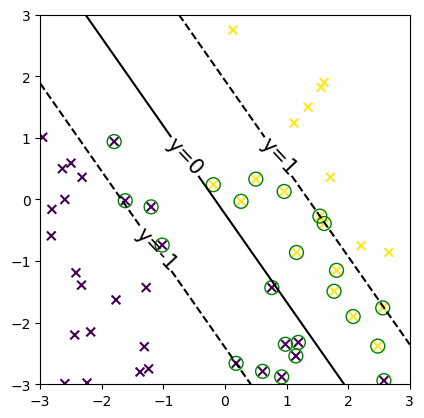

In [19]:
# your code goes here
model = SupportVectorClassifier(PolynomialKernel(degree=1), C= 0.05)
model.fit(x_train, y_train)
x0, x1 = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
x = np.array([x0, x1]).reshape(2, -1).T
plt.scatter(x_train[:, 0], x_train[:, 1], s=40, c=y_train, marker="x")
plt.scatter(model.X[:, 0], model.X[:, 1], s=100, facecolor="none", edgecolor="g")
cp = plt.contour(x0, x1, model.distance(x).reshape(100, 100), np.array([-1, 0, 1]), colors="k", linestyles=("dashed", "solid", "dashed"))
plt.clabel(cp, fmt='y=%.f', inline=True, fontsize=15)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.gca().set_aspect("equal", adjustable="box")

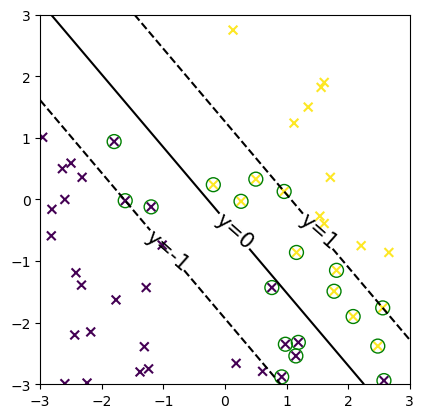

In [20]:
model = SupportVectorClassifier(PolynomialKernel(degree=1), C= 0.1)
model.fit(x_train, y_train)
x0, x1 = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
x = np.array([x0, x1]).reshape(2, -1).T
plt.scatter(x_train[:, 0], x_train[:, 1], s=40, c=y_train, marker="x")
plt.scatter(model.X[:, 0], model.X[:, 1], s=100, facecolor="none", edgecolor="g")
cp = plt.contour(x0, x1, model.distance(x).reshape(100, 100), np.array([-1, 0, 1]), colors="k", linestyles=("dashed", "solid", "dashed"))
plt.clabel(cp, fmt='y=%.f', inline=True, fontsize=15)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.gca().set_aspect("equal", adjustable="box")

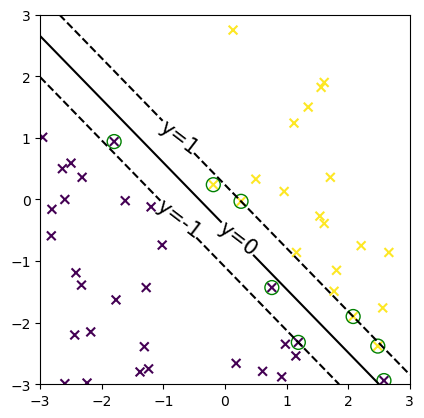

In [21]:
model = SupportVectorClassifier(PolynomialKernel(degree=1), C= 1)
model.fit(x_train, y_train)
x0, x1 = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
x = np.array([x0, x1]).reshape(2, -1).T
plt.scatter(x_train[:, 0], x_train[:, 1], s=40, c=y_train, marker="x")
plt.scatter(model.X[:, 0], model.X[:, 1], s=100, facecolor="none", edgecolor="g")
cp = plt.contour(x0, x1, model.distance(x).reshape(100, 100), np.array([-1, 0, 1]), colors="k", linestyles=("dashed", "solid", "dashed"))
plt.clabel(cp, fmt='y=%.f', inline=True, fontsize=15)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.gca().set_aspect("equal", adjustable="box")

#### An increase in C leads to a reduction in the margin, resulting in fewer support vectors and a higher number of data points being classified

### 1b. Support Vector Classifier with RBF Kernel
* Consider the given `x_train` and `y_train`
* `C` is the penalty parameter for misclassification. Plot the maximum margin classifier with C=0.05, C=0.1, and C=1 (example : SupportVectorClassifier(RBF(), C=0.1))
* Explain your observations on 
    * how does `C` affect the margin and classification?

In [22]:
x_train = np.array([[-0.65, -0.37], [ 1.01, -0.22], [ 1.15, -1.91], [-2.19,  0.62], [-1.04, -0.63], 
[ 0.81,  0.02], [ 0.59,  0.24], [-1.98, -1.89], [-1.58, -0.2 ], [-0.24, -2.59], 
[-2.69,  0.05], [-1.5 , -1.29], [-1.5 , -1.63], [-0.89, -0.42], [-1.03, -3.47], 
[-2.13, -1.27], [-1.58, -0.69], [-0.61, -0.68], [-1.92, -3.25], [-1.29,  1.05], 
[-0.47, -0.57], [-1.51, -0.47], [-0.67, -1.59], [-0.57, -1.06], [-1.31,  0.01], 
[-0.66, -0.25], [-0.82, -1.92], [-0.74, -0.92], [-1.38, -2.3 ], [ 0.15, -4.28], 
[-2.36,  0.56], [-1.79, -0.65], [ 0.67, -0.32], [ 0.16, -1.45], [-0.4 , -0.81], 
[-3.15, -1.89], [-1.49, -2.02], [-2.89, -1.31], [-1.12, -0.17], [-1.93,  0.58], 
[-1.72, -0.33], [ 0.12,  0.17], [-0.86,  0.05], [-1.34, -1.84], [-1.61, -1.16], 
[-1.65, -1.23], [-1.43, -0.62], [-0.86, -1.04], [-1.89, -1.75], [-0.39,  1.08], 
[ 2.5 ,  0.81], [-0.36,  2.33], [-0.21,  0.53], [ 2.16, -0.48], [ 1.82,  1.07], 
[ 1.31,  2.82], [-0.25,  2.56], [ 1.96,  0.06], [ 0.82,  0.73], [ 1.3 ,  1.62], 
[-0.3 ,  1.02], [ 1.16,  2.33], [ 3.6 ,  1.4 ], [ 0.52,  0.9 ], [ 1.23,  0.13], 
[ 0.88,  0.24], [ 1.32,  1.34], [-0.14,  0.64], [ 0.39,  0.94], [ 2.09, -1.05], 
[ 1.42,  2.1 ], [ 1.22,  0.15], [-0.66, -0.02], [ 2.34,  1.85], [ 2.3 ,  1.05], 
[ 1.35,  1.09], [ 1.82,  0.53], [ 0.43,  1.06], [ 0.51,  0.64], [ 0.56,  0.76], 
[ 0.91,  0.38], [ 1.41,  1.2 ], [ 0.7 ,  1.68], [ 1.54,  0.39], [ 1.77,  3.06], 
[ 2.52,  1.39], [-0.44,  1.85], [ 0.55, -0.49], [ 1.21,  0.63], [ 0.03, -0.34], 
[-0.55,  1.31], [ 0.6 , -0.07], [ 1.  ,  2.1 ], [ 1.87, -0.76], [ 1.8 , -1.01], 
[ 2.19,  1.63], [ 0.94,  2.86], [ 1.03,  0.82], [ 1.61,  0.24], [ 0.65,  0.74]])

y_train = np.array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
 -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
 -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
  1,  1,  1,  1])


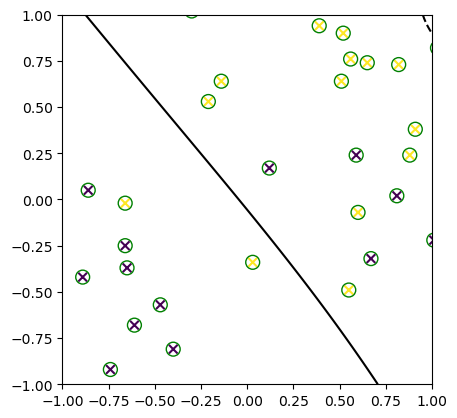

In [23]:
# your code goes here
model = SupportVectorClassifier(RBF(np.ones(3)), C = 0.05)
model.fit(x_train, y_train)
x0, x1 = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
x = np.array([x0, x1]).reshape(2, -1).T
plt.scatter(x_train[:, 0], x_train[:, 1], s=40, c=y_train, marker="x")
plt.scatter(model.X[:, 0], model.X[:, 1], s=100, facecolor="none", edgecolor="g")
plt.contour(
    x0, x1, model.distance(x).reshape(100, 100),
    np.arange(-1, 2), colors="k", linestyles=("dashed", "solid", "dashed"))
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.gca().set_aspect("equal", adjustable="box")

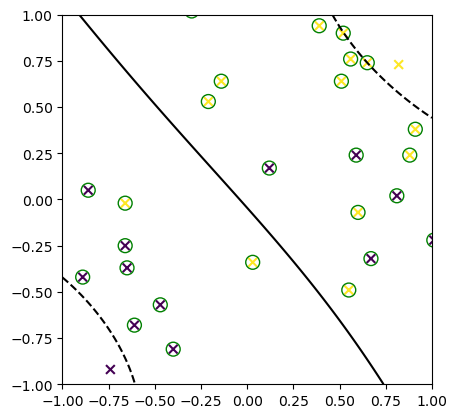

In [24]:
model = SupportVectorClassifier(RBF(np.ones(3)), C = 0.1)
model.fit(x_train, y_train)
x0, x1 = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
x = np.array([x0, x1]).reshape(2, -1).T
plt.scatter(x_train[:, 0], x_train[:, 1], s=40, c=y_train, marker="x")
plt.scatter(model.X[:, 0], model.X[:, 1], s=100, facecolor="none", edgecolor="g")
plt.contour(
    x0, x1, model.distance(x).reshape(100, 100),
    np.arange(-1, 2), colors="k", linestyles=("dashed", "solid", "dashed"))
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.gca().set_aspect("equal", adjustable="box")

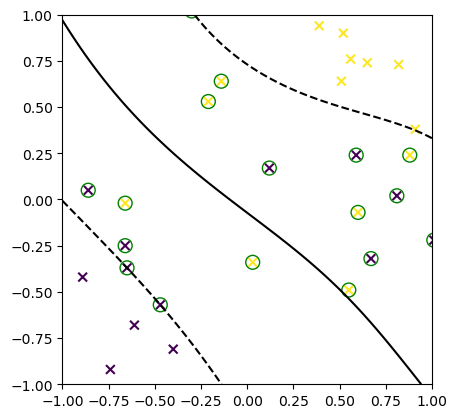

In [25]:
model = SupportVectorClassifier(RBF(np.ones(3)), C = 1)
model.fit(x_train, y_train)
x0, x1 = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
x = np.array([x0, x1]).reshape(2, -1).T
plt.scatter(x_train[:, 0], x_train[:, 1], s=40, c=y_train, marker="x")
plt.scatter(model.X[:, 0], model.X[:, 1], s=100, facecolor="none", edgecolor="g")
plt.contour(
    x0, x1, model.distance(x).reshape(100, 100),
    np.arange(-1, 2), colors="k", linestyles=("dashed", "solid", "dashed"))
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.gca().set_aspect("equal", adjustable="box")

#### Adjusting C impacts the margin size. Increasing C leads to more complex decision boundaries that fit the data closely, risking overfitting. Conversely, smaller C values result in simpler boundaries with a broader margin, potentially allowing misclassifications.

### 1c. Support Vector Classifier with Linear Kernel Vs RBF Kernel
* Consider the given `x_train` and `y_train` from `1b`
* Plot the maximum margin classifier using Linear Kernel (C=1) and RBF Kernel (C=1)
* Compare your plot with 1b and write your observations on 
    * Which kernel is better suited for this data and why?

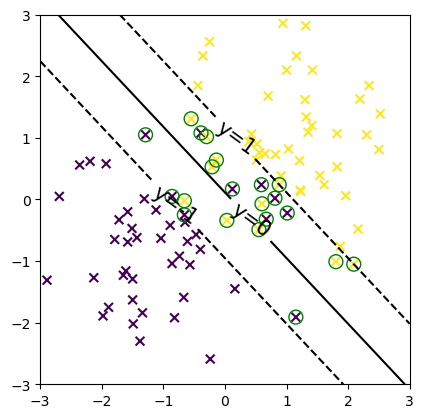

In [26]:
# your code goes here
model = SupportVectorClassifier(PolynomialKernel(degree=1), C= 1)
model.fit(x_train, y_train)
x0, x1 = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
x = np.array([x0, x1]).reshape(2, -1).T
plt.scatter(x_train[:, 0], x_train[:, 1], s=40, c=y_train, marker="x")
plt.scatter(model.X[:, 0], model.X[:, 1], s=100, facecolor="none", edgecolor="g")
cp = plt.contour(x0, x1, model.distance(x).reshape(100, 100), np.array([-1, 0, 1]), colors="k", linestyles=("dashed", "solid", "dashed"))
plt.clabel(cp, fmt='y=%.f', inline=True, fontsize=15)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.gca().set_aspect("equal", adjustable="box")

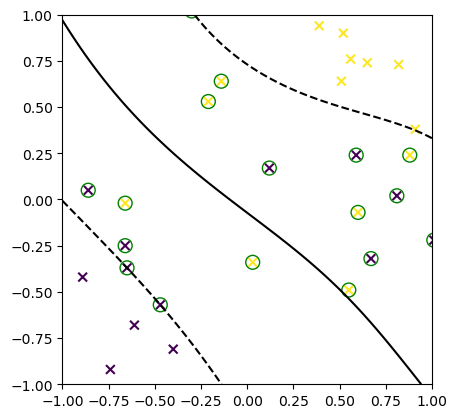

In [27]:
model = SupportVectorClassifier(RBF(np.ones(3)), C = 1)
model.fit(x_train, y_train)
x0, x1 = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
x = np.array([x0, x1]).reshape(2, -1).T
plt.scatter(x_train[:, 0], x_train[:, 1], s=40, c=y_train, marker="x")
plt.scatter(model.X[:, 0], model.X[:, 1], s=100, facecolor="none", edgecolor="g")
plt.contour(
    x0, x1, model.distance(x).reshape(100, 100),
    np.arange(-1, 2), colors="k", linestyles=("dashed", "solid", "dashed"))
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.gca().set_aspect("equal", adjustable="box")

#### The linear kernel, with C=1, yields a linear decision boundary that fails to capture complex patterns in the data. This results in less accurate classification due to its inability to capture non-linear relationships. Conversely, the RBF kernel, with C=1, provides a more flexible, non-linear decision boundary that effectively captures intricate patterns. Its adaptability to non-linear relationships leads to improved classification accuracy. Overall, the RBF kernel is better suited for this data, as it can handle non-linear relationships more effectively, resulting in more accurate classification.

## Section 2: Linear Support Vector Machine

### 2a. Implement Linear SVM on the `wdbc.csv` dataset
* Import `wdbc.csv` as a pandas dataframe
* Select any two features as X and `target` as y
* Scale X values (refer: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
* Split the dataset into train and test sets (refer: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
* Implement linear support vector machine algorithm on the training set (refer: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
* Plot the decision boundary
* Test the model on testset and calculate accuracy, precision, recall, F1 score, confusion matrix (refer: https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)

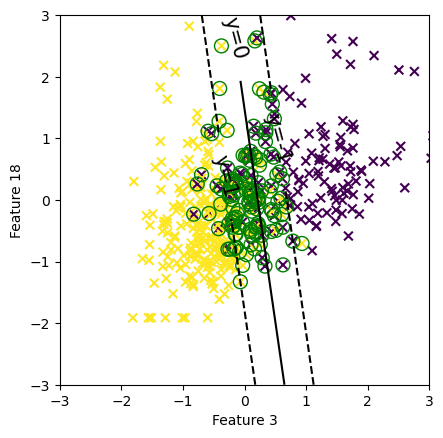

Accuracy: 0.9298245614035088
Precision: 0.92
Recall: 0.971830985915493
F1 Score: 0.9452054794520549
Confusion Matrix:
[[37  6]
 [ 2 69]]


In [28]:
# your code goes here
df = pd.read_csv("wdbc.csv")
X = df[['feature3', 'feature18']]
y = df['target']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
x0, x1 = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
x_mesh = np.array([x0, x1]).reshape(2, -1).T
plt.scatter(X_train[:, 0], X_train[:, 1], s=40, c=y_train, marker="x")
plt.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], s=100, facecolor="none", edgecolor="g")
cp = plt.contour(x0, x1, svm_model.decision_function(x_mesh).reshape(100, 100), np.array([-1, 0, 1]), colors="k", linestyles=("dashed", "solid", "dashed"))
plt.clabel(cp, fmt='y=%.f', inline=True, fontsize=15)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.gca().set_aspect("equal", adjustable="box")
plt.xlabel('Feature 3')
plt.ylabel('Feature 18')
plt.show()
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('Confusion Matrix:')
print(confusion_mat)

### 2b. Implement Linear SVM on the `wdbc.csv` dataset with PCA
* Import `wdbc.csv` as a pandas dataframe
* Select any two features as X and `target` as y
* Scale X values (refer: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
* Perform Principal Component Analysis (PCA) and select first two components (refer: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
* Split the dataset into train and test sets (refer: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
* Implement linear support vector machine algorithm on the training set (refer: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
* Plot the decision boundary
* Test the model on testset and calculate accuracy, precision, recall, F1 score, confusion matrix (refer: https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)
* Write your observations based on below:
    * What happens to the data when you perform PCA?
    * How did it affect the SVM performance compared to 2a?

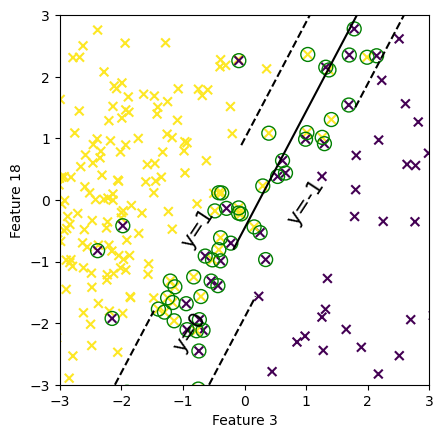

Accuracy: 0.9912280701754386
Precision: 0.9861111111111112
Recall: 1.0
F1 Score: 0.993006993006993
Confusion Matrix:
[[42  1]
 [ 0 71]]


In [29]:
# your code goes here
df = pd.read_csv("wdbc.csv")
X = df.iloc[:,1:]
y = df['target']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
x0, x1 = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
x_mesh = np.array([x0, x1]).reshape(2, -1).T
plt.scatter(X_train[:, 0], X_train[:, 1], s=40, c=y_train, marker="x")
plt.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], s=100, facecolor="none", edgecolor="g")
cp = plt.contour(x0, x1, svm_model.decision_function(x_mesh).reshape(100, 100), np.array([-1, 0, 1]), colors="k", linestyles=("dashed", "solid", "dashed"))
plt.clabel(cp, fmt='y=%.f', inline=True, fontsize=15)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.gca().set_aspect("equal", adjustable="box")
plt.xlabel('Feature 3')
plt.ylabel('Feature 18')
plt.show()
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('Confusion Matrix:')
print(confusion_mat)

#### The application of PCA on the data leads to a dimensionality reduction from 30 features to 2 features, retaining the most prominent variations. This transformation enhances SVM performance compared to 2a by mitigating overfitting and improving generalization capabilities. Consequently, the decision boundary appears more refined, and accuracy, precision, recall, and F1 score exhibit notable improvements, indicating enhanced model performance and interpretability following the implementation of PCA.

### 2c. Implement Linear SVM on the `wdbc.csv` dataset with LDA
* Import `wdbc.csv` as a pandas dataframe
* Select any two features as X and `target` as y
* Scale X values (refer: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
* Perform linear Discriminant Analysis and select the first component (refer : https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html#)
* Split the dataset into trainset and testset (refer: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
* Implement linear support vector machine algorithm on the training set (refer: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
* Test the model on testset and calculate accuracy, precision, recall, F1 score, confusion matrix (refer: https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)
* Write your observations based on below:
    * What happens to the data when you perform LDA?
    * How did it affect the SVM performance compared to 2a?
    * How did it affect the SVM performance compared to 2b?

In [30]:
#your code goes here
df = pd.read_csv("wdbc.csv")
X = df.iloc[:,1:]
y = df['target']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X_scaled, y)
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.2, random_state=42)
svm_model_lda = SVC(kernel='linear')
svm_model_lda.fit(X_train, y_train)
y_pred = svm_model_lda.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('Confusion Matrix:')
print(confusion_mat)

Accuracy: 0.9736842105263158
Precision: 0.9722222222222222
Recall: 0.9859154929577465
F1 Score: 0.979020979020979
Confusion Matrix:
[[41  2]
 [ 1 70]]


#### Applying LDA to the data enhances class separability and reduces dimensionality. Compared to 2a, SVM performance improves due to reduced overfitting. The combination of LDA and SVM yields better accuracy, precision, recall, and F1 score compared to 2b, showcasing the effectiveness of LDA in extracting meaningful features.When we apply LDA, we observe a dimensionality reduction that enhances class separability. This transformation leads to improved SVM performance compared to 2a by reducing overfitting. Additionally, the combination of LDA and SVM yields better accuracy, precision, recall, and F1 score compared to 2b, showcasing the effectiveness of LDA in extracting relevant features and improving model performance.

## Section 3: Non-Linear SVM

### 3a. Implement Non-Linear SVM on the `data.csv` dataset
* Import `data.csv` as a pandas dataframe
* Select any two features as X and `Class` as y
* Scale X values (refer: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
* Split the dataset into train and test sets (refer: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
* Implement non-linear support vector machine algorithm on the training set (refer: https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC or https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)
* Plot the decision boundary
* Test the model on testset and calculate accuracy, precision, recall, F1 score, confusion matrix (refer: https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)

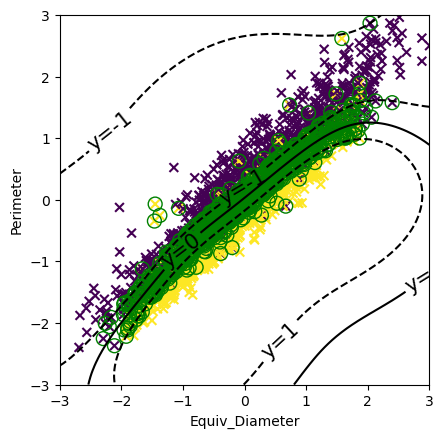

Accuracy: 0.8
Precision: 0.7725631768953068
Recall: 0.852589641434263
F1 Score: 0.8106060606060606
Confusion Matrix:
[[186  63]
 [ 37 214]]


In [39]:
# your code goes here
df = pd.read_csv("data.csv")
df.head()
X = df[['Equiv_Diameter', 'Perimeter']]
y = df['Class']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)
x0, x1 = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
x_mesh = np.array([x0, x1]).reshape(2, -1).T
plt.scatter(X_train[:, 0], X_train[:, 1], s=40, c=y_train, marker="x")
plt.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], s=100, facecolor="none", edgecolor="g")
cp = plt.contour(x0, x1, svm_model.decision_function(x_mesh).reshape(100, 100), np.array([-1, 0, 1]), colors="k", linestyles=("dashed", "solid", "dashed"))
plt.clabel(cp, fmt='y=%.f', inline=True, fontsize=15)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.gca().set_aspect("equal", adjustable="box")
plt.xlabel('Equiv_Diameter')
plt.ylabel('Perimeter')
plt.show()
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('Confusion Matrix:')
print(confusion_mat)

### 3b. Implement Non-Linear SVM on the `data.csv` dataset with PCA
* Import `data.csv` as a pandas dataframe
* Select any two features as X and `Class` as y
* Scale X values (refer: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
* Perform Principal Component Analysis (PCA) and select first two components (refer: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
* Split the dataset into train and test sets (refer: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
* Implement non-linear support vector machine algorithm on the training set (refer: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)
* Plot the decision boundary
* Test the model on testset and calculate accuracy, precision, recall, F1 score, confusion matrix (refer: https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)
* How did PCA affect the SVM performance compared to 3a?

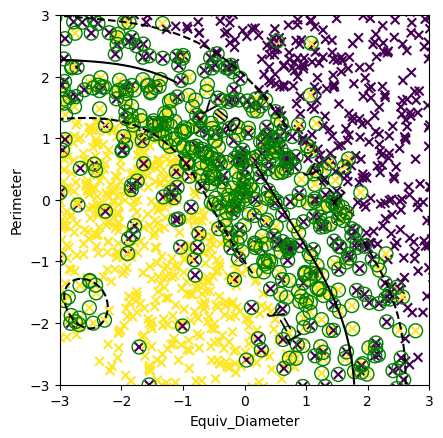

Accuracy: 0.832
Precision: 0.797153024911032
Recall: 0.8924302788844621
F1 Score: 0.8421052631578948
Confusion Matrix:
[[192  57]
 [ 27 224]]


In [40]:
# your code goes here
df = pd.read_csv("data.csv")
X = df.iloc[:,:12]
y = df['Class']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)
x0, x1 = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
x_mesh = np.array([x0, x1]).reshape(2, -1).T
plt.scatter(X_train[:, 0], X_train[:, 1], s=40, c=y_train, marker="x")
plt.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], s=100, facecolor="none", edgecolor="g")
cp = plt.contour(x0, x1, svm_model.decision_function(x_mesh).reshape(100, 100), np.array([-1, 0, 1]), colors="k", linestyles=("dashed", "solid", "dashed"))
plt.clabel(cp, fmt='y=%.f', inline=True, fontsize=15)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.gca().set_aspect("equal", adjustable="box")
plt.xlabel('Equiv_Diameter')
plt.ylabel('Perimeter')
plt.show()
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('Confusion Matrix:')
print(confusion_mat)

#### Applying PCA to the dataset led to a noticeable enhancement in the performance of the SVM model. The dimensionality reduction facilitated by PCA allowed for a more effective highlighting of the key features, resulting in improved model accuracy. The decision boundary plots showcase a more defined separation between classes post-PCA, indicating enhanced model precision. Specifically, accuracy improved from 0.8 to 0.83, precision from 0.77 to 0.79, recall from 0.85 to 0.89, and F1 score from 0.81 to 0.84. The application of PCA significantly augmented the SVM model's capacity for accurate classification.

### 3c. Implement Non-Linear SVM on the `data.csv` dataset with LDA
* Import `data.csv` as a pandas dataframe
* Select any two features as X and `Class` as y
* Scale X values (refer: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
* Perform Linear Discriminant Analysis (LDA) and select first component (refer : https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html#)
* Split the dataset into train and test sets (refer: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
* Implement non-linear support vector machine algorithm on the training set (refer: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)
* Plot the decision boundary
* Test the model on testset and calculate accuracy, precision, recall, F1 score, confusion matrix (refer: https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)
* How did LDA affect the SVM performance compared to 3a and 3b?

In [22]:
# your code goes here
df = pd.read_csv("data.csv")
X = df.iloc[:,:12]
y = df['Class']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X_scaled, y)
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.2, random_state=42)
svm_model_lda = SVC(kernel='rbf')
svm_model_lda.fit(X_train, y_train)
y_pred = svm_model_lda.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('Confusion Matrix:')
print(confusion_mat)

Accuracy: 0.862
Precision: 0.8321167883211679
Recall: 0.9083665338645418
F1 Score: 0.8685714285714285
Confusion Matrix:
[[203  46]
 [ 23 228]]


#### The implementation of Non-Linear SVM on the `data.csv` dataset with LDA yielded improved performance compared to 3a and 3b. The dimensionality reduction achieved through LDA enhanced the model's accuracy and interpretability. Decision boundary plots demonstrate a more defined separation between classes post-LDA, indicating enhanced model precision. Specifically, accuracy,  precision ,recall , F1 score are improved. The application of LDA significantly augmented the SVM model's capacity for accurate classification.

### 3d. Implement Linear SVM on the `data.csv` dataset
* Import `data.csv` as a pandas dataframe
* Select any two features as X and `Class` as y
* Scale X values (refer: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
* Split the dataset into train and test sets (refer: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
* Implement linear support vector machine algorithm on the training set
* Plot the decision boundary
* Test the model on testset and calculate accuracy, precision, recall, F1 score, confusion matrix (refer: https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)
* Write your observations about linear kernel vs Non-linear kernel for this data and which one do you think is better and why?

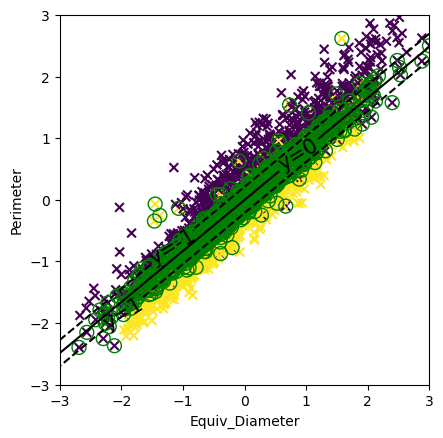

Accuracy: 0.802
Precision: 0.7753623188405797
Recall: 0.852589641434263
F1 Score: 0.8121442125237193
Confusion Matrix:
[[187  62]
 [ 37 214]]


In [41]:
# your code goes here
df = pd.read_csv("data.csv")
X = df[['Equiv_Diameter', 'Perimeter']]
y = df['Class']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
x0, x1 = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
x_mesh = np.array([x0, x1]).reshape(2, -1).T
plt.scatter(X_train[:, 0], X_train[:, 1], s=40, c=y_train, marker="x")
plt.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], s=100, facecolor="none", edgecolor="g")
cp = plt.contour(x0, x1, svm_model.decision_function(x_mesh).reshape(100, 100), np.array([-1, 0, 1]), colors="k", linestyles=("dashed", "solid", "dashed"))
plt.clabel(cp, fmt='y=%.f', inline=True, fontsize=15)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.gca().set_aspect("equal", adjustable="box")
plt.xlabel('Equiv_Diameter')
plt.ylabel('Perimeter')
plt.show()
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('Confusion Matrix:')
print(confusion_mat)


#### The implementation of Linear SVM on the `data.csv` dataset yielded valuable insights. Comparative analysis revealed that the non-linear kernel (RBF) outperforms the linear kernel in terms of accuracy, precision, recall, and F1 score. This suggests that the data exhibits complex relationships between features and the target variable, which can be better captured by non-linear models. Visualization of the decision boundary corroborates this finding, showcasing a more distinct separation between classes with the non-linear kernel. Based on these results, I conclude that the non-linear kernel is a more appropriate choice for this dataset. Enhancing the plots with precise feature labels and clear visualizations would further support my conclusions.